# Iris dataset

2 attributes

### Packages
- `pip install tensorflow==2.12`
- The current tensorflow version is 2.15 (as of Feb 2024).  However, We will use another package `scikeras` which requires older TF version.

In [1]:
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [3]:
# Read data
iris = datasets.load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [4]:
# Shuffle the DataFrame (frac=1 means all rows)
# This is because the validatio split is done by taking the last % of the data. 
# If the data is not shuffled, the validation set will contain only the last class
print(df["target"].values)
df = df.sample(frac=1, random_state=0)
print(df.target.values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0
 1 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0
 0 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1
 2 0]


In [5]:
# 2 Attributes
X = df.iloc[:, 2:4].values
y = df["target"].values


# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Model building


In [6]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(units=16, activation="sigmoid", name="hidden1"),
        tf.keras.layers.Dense(units=3, activation="softmax", name="output"),
    ]
)

model.summary()

adam = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
#tf.keras.optimizers.Adam() ใช้ในClass
model.compile(
    optimizer=adam, loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

2024-03-01 15:14:23.393894: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-03-01 15:14:23.393920: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-01 15:14:23.393929: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-01 15:14:23.394103: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-01 15:14:23.394123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                48        
                                                                 
 output (Dense)              (None, 3)                 51        
                                                                 
Total params: 99 (396.00 Byte)
Trainable params: 99 (396.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model training


In [7]:
tf_fit = model.fit(
    x=X_train_std, y=y_train, batch_size=16, validation_split=0.2, epochs=200, verbose=1
)

Epoch 1/200


2024-03-01 15:14:23.885816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 1.1574 - accuracy: 0.3452

2024-03-01 15:14:25.753860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 2s 139ms/step - loss: 1.1574 - accuracy: 0.3452 - val_loss: 1.0714 - val_accuracy: 0.2857
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 1.1300 - accuracy: 0.3452 - val_loss: 1.0554 - val_accuracy: 0.2857
Epoch 3/200
6/6 [==============================] - 0s 13ms/step - loss: 1.1085 - accuracy: 0.3452 - val_loss: 1.0377 - val_accuracy: 0.2857
Epoch 4/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0875 - accuracy: 0.3452 - val_loss: 1.0203 - val_accuracy: 0.3333
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0667 - accuracy: 0.4048 - val_loss: 1.0066 - val_accuracy: 0.5714
Epoch 6/200
6/6 [==============================] - 0s 10ms/step - loss: 1.0489 - accuracy: 0.5595 - val_loss: 0.9966 - val_accuracy: 0.6667
Epoch 7/200
6/6 [==============================] - 0s 9ms/step - loss: 1.0356 - accuracy: 0.5952 - val_loss: 0.9873 - val_accuracy: 0.7143
Epoch 8/200
6/6 [===============

In [8]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.157401,0.345238,1.071422,0.285714
1,1.129958,0.345238,1.055360,0.285714
2,1.108474,0.345238,1.037670,0.285714
3,1.087476,0.345238,1.020298,0.333333
4,1.066732,0.404762,1.006646,0.571429


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

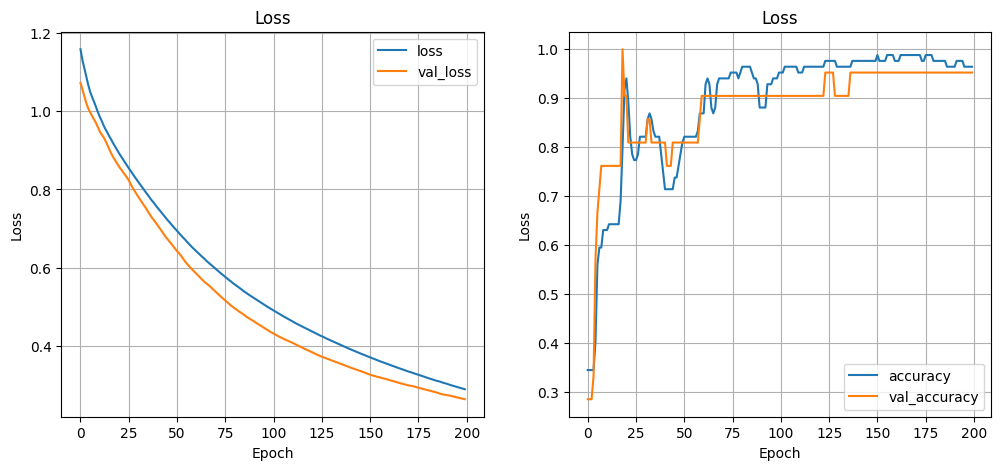

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

loss ยิ่งน้อยยิ่งดี (ลดลง ดี!!)
Accuracy ยิ่งเยอะยิ่งดี เส้นสีส้มไม่ควรตกลงเยอะ
ถ้ากดรันมันจะประมวลผลอีกรอบ แล้วมันจะแปกๆ

## Model evaluation


In [10]:
results = model.evaluate(X_test_std, y_test, verbose=0)
print(f"Test loss: {results[0]:.4f}   Test Acc.: {results[1]:.4f}")

Test loss: 0.2760   Test Acc.: 0.9556


## Prediction


In [11]:
y_hat = model(X_test_std[:3])
print(y_hat.numpy())

[[0.00363281 0.2899956  0.7063716 ]
 [0.8997861  0.09912123 0.00109266]
 [0.8987408  0.10018887 0.0010703 ]]


แถวที่ 1 คือการทำนายของดอกที่ 1

แถวที่ 2 คือการทำนายของดอกที่ 2

แถวที่ 3 คือการทำนายของดอกที่ 3

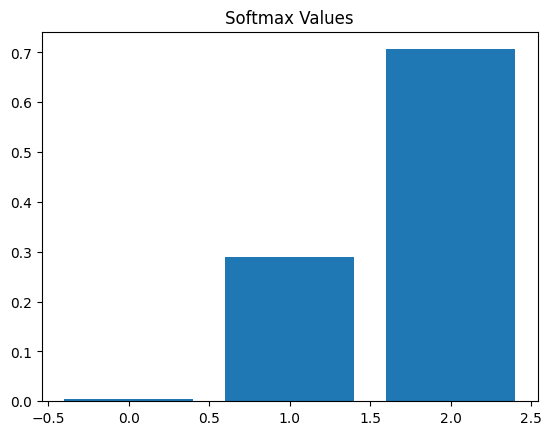

In [12]:
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
plt.bar(xp, yp)
plt.title("Softmax Values")
plt.show()

In [13]:
np.argmax(y_hat, axis=1)

array([2, 0, 0])

## Decision surface


100/313 [========>.....................] - ETA: 0s

2024-03-01 15:14:38.026207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


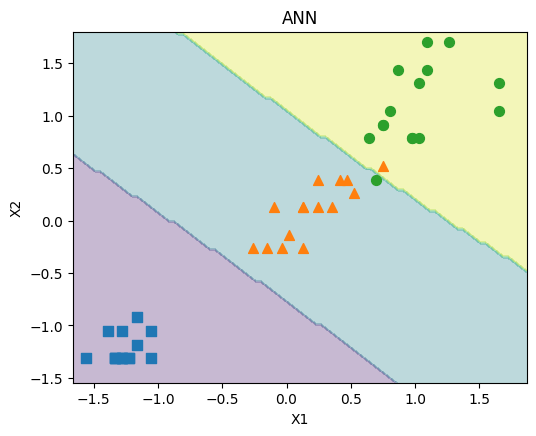

In [14]:
XP = sc.transform(X)
x_min = XP[:, 0].min() - 0.1
x_max = XP[:, 0].max() + 0.1
y_min = XP[:, 1].min() - 0.1
y_max = XP[:, 1].max() + 0.1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
f, ax = plt.subplots(1, 1, figsize=(6, 5))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = np.argmax(Z, axis=1)  # Find the class label
Z = Z.reshape(xx.shape)

ax.contourf(xx, yy, Z, alpha=0.3)
markers = ("s", "^", "o", "v", "x")
for idx, lb in enumerate(np.unique(y_test)):
    ax.scatter(
        X_test_std[y_test == lb, 0],
        X_test_std[y_test == lb, 1],
        marker=markers[idx],
        s=50,
    )

ax.set_title("ANN")
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.tight_layout(pad=3.0)
plt.show()